# Create multi-model ensembles (MME)
1. Equally weighted ensemble (same weight to each quantile).
2. MME using the degenerate EM algorithm.

In [38]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import pandas as pd
import numpy as np
import itertools
import sys
import re
import os

sys.path.insert(0, "..")

from global_config import config

results_dir   = config.get_property('results_dir')
data_dir      = config.get_property('data_dir')

def create_df_ensemble(weights_df, forecast_df_list, name_models):
    e_df = [forecast_df_list[idx]* weights_df.loc[name_models[idx]]["weigth"] for idx in range(len(forecast_df_list))]
    e_df = sum(e_df)
    return e_df

In [39]:
path_to_frcst_1 = os.path.join(results_dir, "forecast", "arima")
path_to_frcst_2 = os.path.join(results_dir, "forecast", "BD_eakf_model1")
path_to_frcst_3 = os.path.join(results_dir, "forecast", "BD_eakf_model2")
path_to_frcst_4 = os.path.join(results_dir, "forecast", "BD_eakf_model3")
path_to_frcst_5 = os.path.join(results_dir, "forecast", "sarima")

data_df         = pd.read_csv(os.path.join(data_dir, "processed_data_us.csv"), parse_dates=["date"])
dates_forecasts = data_df.date[11:].values


In [40]:
from utils.utils_frcst import degenerate_em_weights

In [41]:

for idx_date, date_use in enumerate(dates_forecasts):

    past_scores  = -1 # window size, not used here.
    #date_use_idx = 6

    prev_dates  = pd.to_datetime(dates_forecasts[:idx_date])
    date_str    = pd.to_datetime(date_use).strftime("%Y-%m-%d")

    frcst1_df   = pd.read_csv(os.path.join(path_to_frcst_1, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["forecast_date"]).set_index(["date"]).iloc[:6]
    frcst2_df   = pd.read_csv(os.path.join(path_to_frcst_2, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["Unnamed: 0", "type", "std", "forecast_date"]).set_index(["date"]).iloc[:6]
    frcst3_df   = pd.read_csv(os.path.join(path_to_frcst_3, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["Unnamed: 0", "type", "std", "forecast_date"]).set_index(["date"]).iloc[:6]
    frcst4_df   = pd.read_csv(os.path.join(path_to_frcst_4, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["Unnamed: 0", "type", "std", "forecast_date"]).set_index(["date"]).iloc[:6]
    frcst5_df   = pd.read_csv(os.path.join(path_to_frcst_5, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["forecast_date"]).set_index(["date"]).iloc[:6]

    f_list       = [frcst1_df, frcst2_df, frcst3_df, frcst4_df, frcst5_df]
    name_models  = ['arima', 'eakf_model1', 'eakf_model2', "eakf_model3", "sarima"]

    
    w_df         = degenerate_em_weights(np.array([[1, 1, 1, 1, 1]])/5, models_name=name_models)
    ens_df       = create_df_ensemble(w_df, f_list, name_models)

    path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", "equal_weights")
    os.makedirs(path_to_save_ens, exist_ok=True)
    ens_df.to_csv((os.path.join(path_to_save_ens,  f"{date_str}.csv")))


In [43]:
idx_date, date_use  = next(iter(enumerate(dates_forecasts)))

prev_dates  = pd.to_datetime(dates_forecasts[:idx_date])
date_str    = pd.to_datetime(date_use).strftime("%Y-%m-%d")

frcst1_df   = pd.read_csv(os.path.join(path_to_frcst_1, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["forecast_date"]).set_index(["date"]).iloc[:6]
frcst2_df   = pd.read_csv(os.path.join(path_to_frcst_2, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["Unnamed: 0", "type", "std", "forecast_date"]).set_index(["date"]).iloc[:6]
frcst3_df   = pd.read_csv(os.path.join(path_to_frcst_3, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["Unnamed: 0", "type", "std", "forecast_date"]).set_index(["date"]).iloc[:6]
frcst4_df   = pd.read_csv(os.path.join(path_to_frcst_4, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["Unnamed: 0", "type", "std", "forecast_date"]).set_index(["date"]).iloc[:6]
frcst5_df   = pd.read_csv(os.path.join(path_to_frcst_5, f"{date_str}.csv"), parse_dates=["date", "forecast_date"]).drop(columns=["forecast_date"]).set_index(["date"]).iloc[:6]

f_list       = [frcst1_df, frcst2_df, frcst3_df, frcst4_df, frcst5_df]
name_models  = ['arima', 'eakf_model1', 'eakf_model2', "eakf_model3", "sarima"]

In [50]:
frcst2_df

,mean,median,low_5,up_5,low_10,up_10,low_15,up_15,low_20,up_20,...,up_80,low_85,up_85,low_90,up_90,low_95,up_95,low_97.5,up_97.5,add
date,,,,,,,,,,,,,,,,,,,,,
2007-01-31,44.053333,44.0,44.0,45.000,43.0,45.0,43.000,45.000,43.0,46.0,...,52.0,33.0,54.000,32.0,56.00,31.000,60.000,27.4750,61.5250,0
2007-02-28,43.003333,42.5,42.0,43.000,42.0,44.0,41.000,44.925,40.0,45.0,...,53.0,32.0,54.575,31.0,57.00,29.000,59.000,27.0000,63.5250,0
2007-03-31,44.533333,44.0,44.0,44.975,43.0,45.0,43.000,45.000,42.0,46.0,...,56.0,33.0,59.000,31.0,60.05,28.475,63.000,26.0000,67.0000,0
2007-04-30,43.160000,42.0,42.0,43.000,41.0,44.0,41.000,44.000,40.0,45.0,...,56.0,32.0,57.000,30.0,57.05,28.000,60.000,26.0000,61.0000,0
2007-05-31,44.480000,44.0,43.0,44.000,43.0,45.0,42.075,45.000,42.0,46.0,...,57.0,32.0,58.000,30.0,61.00,29.000,63.525,27.7375,68.2625,0
2007-06-30,43.210000,42.0,42.0,43.000,41.0,43.0,41.000,44.000,41.0,45.0,...,56.0,31.0,58.000,30.0,60.00,28.000,62.000,25.7375,65.2625,0


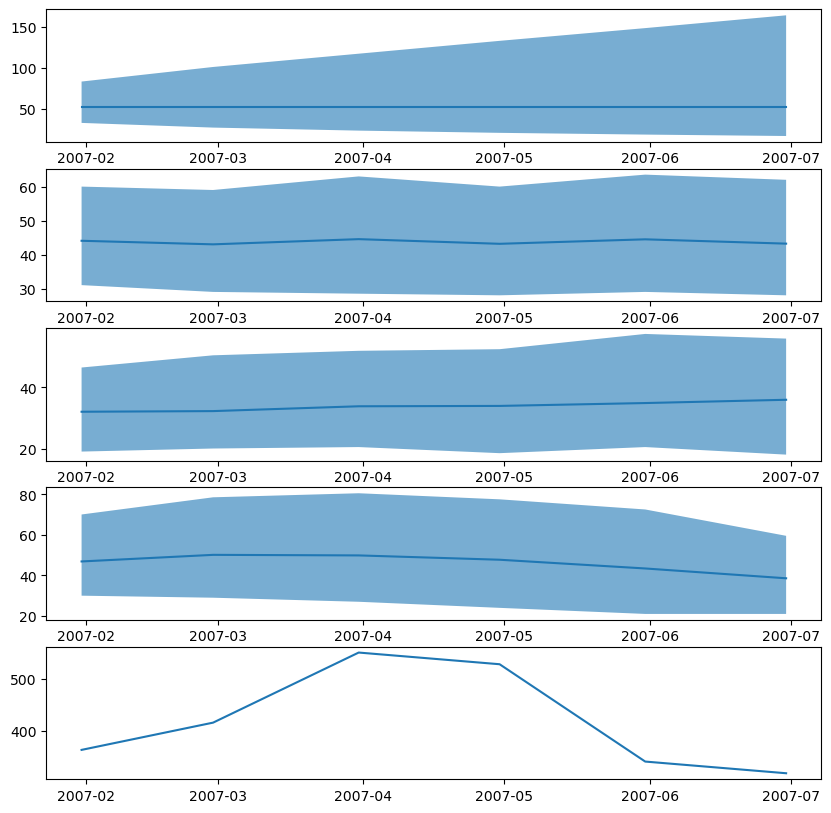

In [53]:
fig, ax = plt.subplots(5, 1, figsize=(10, 10))

ax[0].plot(frcst1_df.index.values, frcst1_df['mean'], label='Arima')
ax[1].plot(frcst2_df.index.values, frcst2_df['mean'], label='Model1')
ax[2].plot(frcst3_df.index.values, frcst3_df['mean'], label='Model2')
ax[3].plot(frcst4_df.index.values, frcst4_df['mean'], label='Model3')
ax[4].plot(frcst5_df.index.values, frcst5_df['mean'], label='Sarima')

ax[0].fill_between(frcst1_df.index.values, frcst1_df['low_95'], frcst1_df['up_95'], label='Arima', alpha=0.6)
ax[1].fill_between(frcst2_df.index.values, frcst2_df['low_95'], frcst2_df['up_95'], label='Model1', alpha=0.6)
ax[2].fill_between(frcst3_df.index.values, frcst3_df['low_95'], frcst3_df['up_95'], label='Model2', alpha=0.6)
ax[3].fill_between(frcst4_df.index.values, frcst4_df['low_95'], frcst4_df['up_95'], label='Model3', alpha=0.6)
ax[4].fill_between(frcst5_df.index.values, frcst5_df['low_95'], frcst5_df['up_95'], label='Sarima', alpha=0.6)

In [74]:
wis             = np.array([[11.5, 11.5, 11.5, 11.5, 20]])

normalize_score = 1 - wis/np.linalg.norm(wis, axis=1, keepdims=True)
normalize_score = 1 - wis/wis.sum(axis=1, keepdims=True)

w_df         = degenerate_em_weights(normalize_score, models_name=["model1", "model2", "model3", "model4", "model5"])
w_df

,weigth
model_name,
model1,2.500000e-01
model2,2.500000e-01
model3,2.500000e-01
model4,2.500000e-01
model5,5.794688e-13


array([[0.05491882, 0.05444126, 0.21728749, 0.28892073, 0.38443171],
       [0.06784661, 0.06784661, 0.26843658, 0.12094395, 0.47492625]])

### 1. Use all past performance data to train the model

In [33]:
forecast_windows = {"1m": 1, "2m": 2, "3m": 3, "4m": 4, "5m": 5, "6m": 6}
scores           = ["wis"]
dates_use        = dates_forecasts[6:]

for idx_date_use, date_use in enumerate(dates_use):
    for fw in list(list(forecast_windows.keys())):

        fw_int       = int(fw[0])-1
        past_scores  = -1 # window size, not used here.
        date_use_idx = 6+idx_date_use

        prev_dates  = pd.to_datetime(dates_forecasts[:date_use_idx-fw_int])
        date_str    = pd.to_datetime(date_use).strftime("%Y-%m-%d")

        f_date_df      = forecasts_df[forecasts_df["forecast_date"] == date_str]

        forecast1_df   = f_date_df[f_date_df.model == 'arima'].iloc[:6].set_index(["date"]).drop(columns=["add", "model" , "forecast_date"])
        forecast2_df   = f_date_df[f_date_df.model == 'model1'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
        forecast3_df   = f_date_df[f_date_df.model == 'model2'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
        forecast4_df   = f_date_df[f_date_df.model == 'model3'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
        forecast5_df   = f_date_df[f_date_df.model == 'sarima'].iloc[:6].set_index(["date"]).drop(columns=["add", "model", "forecast_date"])

        # put forecasts in a list
        f_list       = [forecast1_df, forecast2_df, forecast3_df, forecast4_df, forecast5_df]

        evals_use_df = evals_df[evals_df.frsct_date.isin(prev_dates)]
        evals_use_df = evals_use_df[evals_use_df.eval_horizon==fw]

        eval_ma_df  = pd.pivot(evals_use_df, index="frsct_date", columns="method", values="wis")
        eval_ma_df  = eval_ma_df.fillna(1000)
        name_models = list(eval_ma_df.keys())

        normalize_score = 1 - eval_ma_df.to_numpy()/np.linalg.norm(eval_ma_df.to_numpy(), axis=1, keepdims=True)

        w_df            = degenerate_em_weights(normalize_score, models_name=name_models)
        ens_df          = create_df_ensemble(w_df, f_list, name_models)

        path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", "all_past", f"wis", fw)
        path_to_save_w   = os.path.join(path_to_save_ens, "weights")

        os.makedirs(path_to_save_ens, exist_ok=True)
        os.makedirs(path_to_save_w, exist_ok=True)

        w_df.to_csv(os.path.join(path_to_save_w,  f"{date_str}.csv"))
        ens_df.to_csv((os.path.join(path_to_save_ens,  f"{date_str}.csv")))


In [7]:
forecast_windows = {"1m": 1, "2m": 2, "3m": 3, "4m": 4, "5m": 5, "6m": 6}
scores           = ["wis"]
dates_use        = dates_forecasts[6:]

weights_df = []
for idx_date_use, date_use in enumerate(dates_use):
    date_str    = pd.to_datetime(date_use).strftime("%Y-%m-%d")
    for fw in list(list(forecast_windows.keys())):

        path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", "all_past", f"wis", fw)
        path_to_save_w   = os.path.join(path_to_save_ens, "weights")

        w_df                    = pd.read_csv(os.path.join(path_to_save_w,  f"{date_str}.csv"))
        w_df["date_forecast"]   = date_str
        w_df["forecast_window"] = fw
        weights_df.append(w_df)

weights_df = pd.concat(weights_df)
weights_df.to_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_weights_AllPast.csv"))

## 2. Use k-months past performance data to train the model
We used k from 2 to 6 months.

In [34]:
forecast_windows = {"1m": 1, "2m": 2, "3m": 3, "4m": 4, "5m": 5, "6m": 6}
score_use_to_ensemble = "wis"

dates_use       = dates_forecasts[6:]
past_points_use = [2, 3, 4, 5, 6]

for K in past_points_use:
    for idx_date_use, date_use in enumerate(dates_use):
        for fw in list(list(forecast_windows.keys())):

            fw_int = int(fw[0])-1

            past_scores  = -1 # window size, not used here.
            date_use_idx = 6+idx_date_use
            date_str    = pd.to_datetime(date_use).strftime("%Y-%m-%d")

            prev_dates  = pd.to_datetime(dates_forecasts[date_use_idx-fw_int-K:date_use_idx-fw_int])
            if len(prev_dates)==0:
                continue

            f_date_df      = forecasts_df[forecasts_df["forecast_date"] == date_str]

            forecast1_df   = f_date_df[f_date_df.model == 'arima'].iloc[:6].set_index(["date"]).drop(columns=["add", "model" , "forecast_date"])
            forecast2_df   = f_date_df[f_date_df.model == 'model1'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
            forecast3_df   = f_date_df[f_date_df.model == 'model2'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
            forecast4_df   = f_date_df[f_date_df.model == 'model3'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
            forecast5_df   = f_date_df[f_date_df.model == 'sarima'].iloc[:6].set_index(["date"]).drop(columns=["add", "model", "forecast_date"])

            # put forecasts in a list
            f_list       = [forecast1_df, forecast2_df, forecast3_df, forecast4_df, forecast5_df]

            evals_use_df = evals_df[evals_df.frsct_date.isin(pd.to_datetime(prev_dates))]
            evals_use_df = evals_use_df[evals_use_df.eval_horizon==fw]

            if len(evals_use_df)==0:
                continue

            eval_ma_df  = pd.pivot(evals_use_df, index="frsct_date", columns="method", values=score_use_to_ensemble)
            eval_ma_df  = eval_ma_df.fillna(1000)
            name_models = list(eval_ma_df.keys())


            normalize_score = 1 - eval_ma_df.to_numpy()/np.linalg.norm(eval_ma_df.to_numpy(), axis=1, keepdims=True)
            w_df            = degenerate_em_weights(normalize_score, models_name=name_models)
            ens_df          = create_df_ensemble(w_df, f_list, name_models)

            ##### - ##### - ##### - ##### - ##### - ##### - #####
            path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", f"{K}_months_past", fw)
            path_to_save_w   = os.path.join(path_to_save_ens, "weights")
            ##### - ##### - ##### - ##### - ##### - ##### - #####

            os.makedirs(path_to_save_ens, exist_ok=True)
            os.makedirs(path_to_save_w, exist_ok=True)

            w_df.to_csv(os.path.join(path_to_save_w,  f"{date_str}.csv"))
            ens_df.to_csv((os.path.join(path_to_save_ens,  f"{date_str}.csv")))


In [35]:
weights_df = []
for K in past_points_use:
    for idx_date_use, date_use in enumerate(dates_use):
        for fw in list(list(forecast_windows.keys())):

            path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", f"{K}_months_past", fw)
            path_to_save_w   = os.path.join(path_to_save_ens, "weights")

            try:
                date_str                = pd.to_datetime(date_use).strftime("%Y-%m-%d")
                w_df                    = pd.read_csv(os.path.join(path_to_save_w,  f"{date_str}.csv"))
                w_df["date_forecast"]   = date_str
                w_df["forecast_window"] = fw
                w_df["past_months"]     = K
            except:
                continue
            weights_df.append(w_df)

weights_df = pd.concat(weights_df)
weights_df.to_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_weights_KPast.csv"))


## 2. Use k-months past performance data to train the model
We used k from 2 to 6 months.

In [36]:
forecast_windows = {"1m": 1, "2m": 2, "3m": 3, "4m": 4, "5m": 5, "6m": 6}
score_use_to_ensemble = "wis"

dates_use       = dates_forecasts[6:]
past_points_use = [2, 3, 4, 5, 6]

for K in past_points_use:
    for idx_date_use, date_use in enumerate(dates_use):
        for fw in list(list(forecast_windows.keys())):

            fw_int = int(fw[0])-1

            past_scores  = -1 # window size, not used here.
            date_use_idx = 6+idx_date_use
            date_str     = pd.to_datetime(date_use).strftime("%Y-%m-%d")

            prev_dates  = pd.to_datetime(dates_forecasts[date_use_idx-fw_int-K:date_use_idx-fw_int])
            if len(prev_dates)==0:
                continue

            f_date_df      = forecasts_df[forecasts_df["forecast_date"] == date_str]

            forecast1_df   = f_date_df[f_date_df.model == 'arima'].iloc[:6].set_index(["date"]).drop(columns=["add", "model" , "forecast_date"])
            forecast2_df   = f_date_df[f_date_df.model == 'model1'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
            forecast3_df   = f_date_df[f_date_df.model == 'model2'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
            forecast4_df   = f_date_df[f_date_df.model == 'model3'].iloc[:6].set_index(["date"]).drop(columns=["add", "model","Unnamed: 0", "type", "std", "forecast_date"])
            forecast5_df   = f_date_df[f_date_df.model == 'sarima'].iloc[:6].set_index(["date"]).drop(columns=["add", "model", "forecast_date"])

            f_list       = [forecast1_df, forecast2_df, forecast3_df, forecast4_df, forecast5_df]
            evals_use_df = evals_df[evals_df.frsct_date.isin(pd.to_datetime(prev_dates))]
            evals_use_df = evals_use_df[evals_use_df.eval_horizon==fw]

            if len(evals_use_df)==0:
                continue

            eval_ma_df      = pd.pivot(evals_use_df, index="frsct_date", columns="method", values=score_use_to_ensemble)
            eval_ma_df      = eval_ma_df.fillna(1000)
            name_models     = list(eval_ma_df.keys())

            normalize_score = 1 - eval_ma_df.to_numpy()/np.linalg.norm(eval_ma_df.to_numpy(), axis=1, keepdims=True)
            w_df            = degenerate_em_weights(normalize_score, models_name=name_models)
            ens_df          = create_df_ensemble(w_df, f_list, name_models)

            ##### - ##### - ##### - ##### - ##### - ##### - #####
            path_to_save_ens = os.path.join(results_dir, "forecast", "BD_ensemble", f"{K}_months_past", fw)
            path_to_save_w   = os.path.join(path_to_save_ens, "weights")
            ##### - ##### - ##### - ##### - ##### - ##### - #####

            os.makedirs(path_to_save_ens, exist_ok=True)
            os.makedirs(path_to_save_w, exist_ok=True)

            w_df.to_csv(os.path.join(path_to_save_w,  f"{date_str}.csv"))
            ens_df.to_csv((os.path.join(path_to_save_ens,  f"{date_str}.csv")))


In [37]:
weights_df = []
for K in past_points_use:
    for idx_date_use, date_use in enumerate(dates_use):
        for fw in list(list(forecast_windows.keys())):

            path_to_save_ens = os.path.join(results_dir, "forecast", "ensemble", f"{K}_months_past", fw)
            path_to_save_w   = os.path.join(path_to_save_ens, "weights")
            try:
                date_str                = pd.to_datetime(date_use).strftime("%Y-%m-%d")
                w_df                    = pd.read_csv(os.path.join(path_to_save_w,  f"{date_str}.csv"))
                w_df["date_forecast"]   = date_str
                w_df["forecast_window"] = fw
                w_df["past_months"]     = K
            except:
                continue

            weights_df.append(w_df)
weights_df = pd.concat(weights_df)
weights_df.to_csv(os.path.join(results_dir, "forecast", "evaluation", "BD_weights_KPast.csv"))